# Visualize network permutation

In [1]:
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from config import PIPELINE_RUN_DIR, AMIMS, NETWORKS, SEED_SETS
from functions import split_module_id

In [3]:
path = os.path.join(PIPELINE_RUN_DIR, "main/results/mqc_summaries/network_permutation_mqc.tsv")

In [4]:
amim_meta_df = pd.DataFrame.from_dict(AMIMS)
network_meta_df = pd.DataFrame.from_dict(NETWORKS)
seed_meta_df = pd.DataFrame.from_dict(SEED_SETS)

# Drop "no_tool" from the amim meta df
amim_meta_df = amim_meta_df[amim_meta_df.id != "no_tool"]


df = pd.read_csv(path, sep="\t")
df[["seed_id","network_id","amim_id"]] = df.id.apply(split_module_id)
df["network"] = df["network_id"].replace(dict(zip(network_meta_df.id, network_meta_df.label)))
df["amim"] = df["amim_id"].replace(dict(zip(amim_meta_df.id, amim_meta_df.label)))

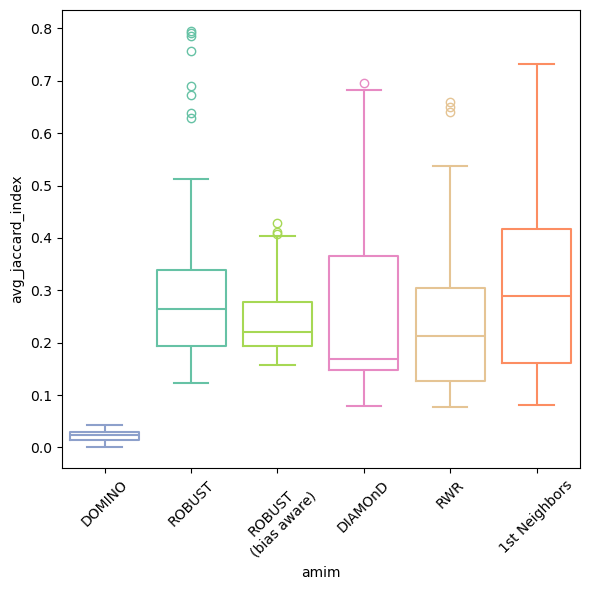

In [6]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=df, y="avg_jaccard_index", hue="amim", x="amim", fill=False, palette=dict(zip(amim_meta_df.label, amim_meta_df.color)), order=amim_meta_df.label)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


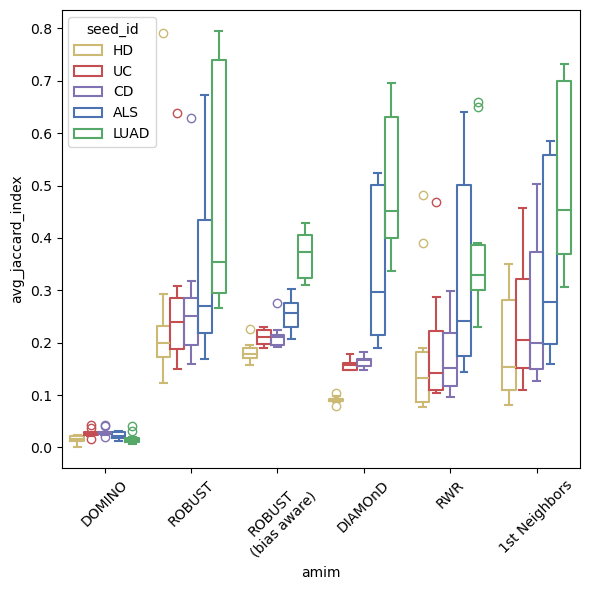

In [7]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=df, y="avg_jaccard_index", hue="seed_id", x="amim", fill=False, palette=dict(zip(seed_meta_df.short, seed_meta_df.color)), order=amim_meta_df.label, hue_order=seed_meta_df.short)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

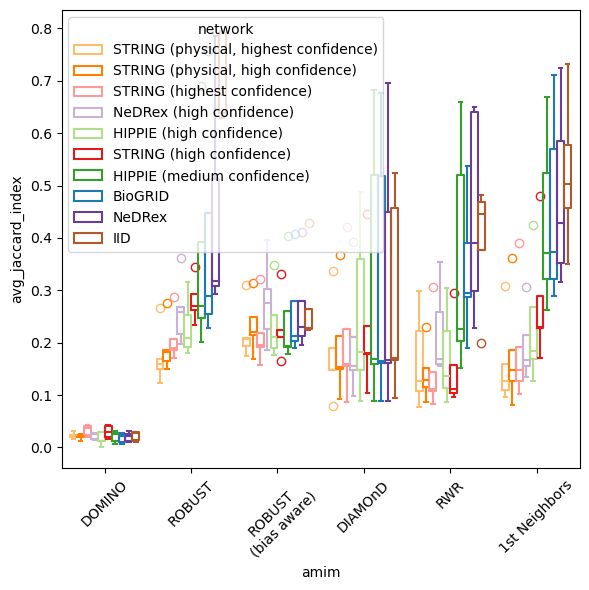

In [9]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=df, y="avg_jaccard_index", hue="network", x="amim", fill=False, palette=dict(zip(network_meta_df.label, network_meta_df.color)), order=amim_meta_df.label, hue_order=network_meta_df.label)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()